Here I am trying to learn the basics of Tensorflow based on the video lectures by [Sentdex](https://www.youtube.com/playlist?list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN).

# Basics

In [0]:
import tensorflow as tf

In [0]:
import matplotlib.pyplot as plt

In [0]:
import numpy as np

In [0]:
import os
import cv2

In [0]:
import random

In [2]:
tf.__version__

'2.2.0-rc2'

In [0]:
mnist = tf.keras.datasets.mnist

In [4]:
mnist

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


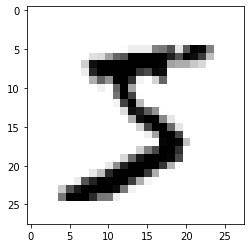

In [10]:
plt.imshow(x_train[0], cmap = 'gray_r')
plt.show()

In [0]:
#normalizing x_train and x_test
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

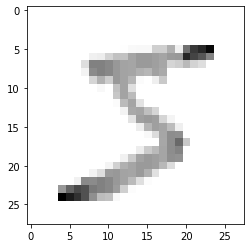

In [12]:
plt.imshow(x_train[0], cmap = 'gray_r')
plt.show()

In [14]:
#creating the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2605 - accuracy: 0.9237
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1053 - accuracy: 0.9677
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0721 - accuracy: 0.9765


In [15]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.9729
0.09145291894674301 0.9728999733924866


In [16]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [0]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [0]:
predictions = new_model.predict(x_test)

In [20]:
print(predictions)

[[1.8779134e-11 1.5648578e-09 1.3088312e-07 ... 9.9999785e-01
  6.8941947e-10 1.1460575e-07]
 [1.4383141e-08 4.6826513e-05 9.9994838e-01 ... 2.4126931e-10
  2.0822304e-07 1.8070943e-12]
 [7.6684998e-08 9.9820912e-01 3.2663441e-04 ... 1.2932699e-03
  7.9521880e-05 4.9826343e-07]
 ...
 [6.2830147e-10 2.9196659e-07 2.6302578e-07 ... 3.0479406e-04
  1.5991449e-05 2.6330714e-05]
 [8.6346250e-07 7.7240088e-08 4.7191875e-08 ... 1.0694085e-07
  6.1031996e-04 5.1809255e-09]
 [5.5891348e-07 5.2239774e-10 8.6556220e-09 ... 8.8469223e-12
  1.5404467e-08 4.7673459e-11]]


In [22]:
print(np.argmax(predictions[0]))

7


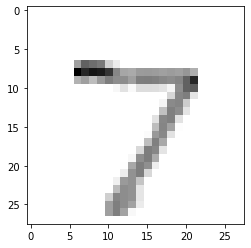

In [23]:
plt.imshow(x_test[0], cmap = 'gray_r')
plt.show()

# Some experiments with the Cats vs Dogs dataset

In [37]:
!wget -c https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

--2020-04-10 04:15:28--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.132.69
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.132.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  16.4MB/s    in 35s     

2020-04-10 04:16:05 (15.7 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



In [38]:
!ls

Cat_Dog_data.zip  epic_num_reader.model  sample_data


In [0]:
!unzip Cat_Dog_data.zip

In [41]:
!ls

Cat_Dog_data  Cat_Dog_data.zip	epic_num_reader.model  __MACOSX  sample_data


In [0]:
DATADIR = os.path.join(os.getcwd(), 'Cat_Dog_data')

In [43]:
DATADIR

'/content/Cat_Dog_data'

In [44]:
cd Cat_Dog_data/

/content/Cat_Dog_data


In [45]:
!ls

test  train


In [0]:
test_path = os.path.join(os.getcwd(), 'test')
train_path = os.path.join(os.getcwd(), 'train')

In [47]:
%cd train

/content/Cat_Dog_data/train


In [48]:
!ls

cat  dog


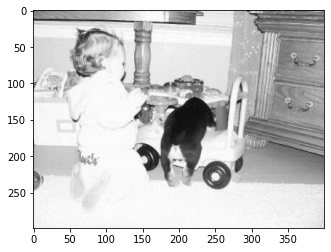

In [49]:
categories = os.listdir(os.getcwd())
for category in categories:
  path = os.path.join(os.getcwd(), category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    break
  break

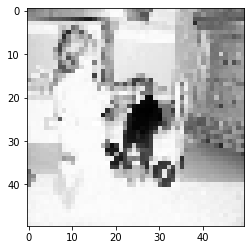

In [51]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [52]:
!ls

cat  dog


In [0]:
def create_training_data():
  CATEGORIES = os.listdir(os.getcwd())
  for category in CATEGORIES:
    class_num = CATEGORIES.index(category)
    for img in os.listdir(os.path.join(os.getcwd(), os.listdir(os.getcwd()))):
      img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (50, 50))
      training_data.append([new_array, class_num])


In [55]:
!ls

cat  dog


In [0]:
cat_path = os.path.join(os.getcwd(), 'cat')
dog_path = os.path.join(os.getcwd(), 'dog')

In [0]:
def create_training_data():
  training_data = []
  for img in os.listdir(cat_path):
    img_array = cv2.imread(os.path.join(cat_path, img), cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (50,50))
    training_data.append([new_array, 0])
  for img in os.listdir(dog_path):
    img_array = cv2.imread(os.path.join(dog_path, img), cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (50,50))
    training_data.append([new_array, 1])
  return np.array(training_data)

In [0]:
training_data = create_training_data()

In [68]:
training_data.shape

(22500, 2)

In [69]:
training_data[0]

array([array([[106, 106, 101, ..., 161, 164, 164],
       [ 98,  94,  99, ..., 158, 164, 162],
       [ 91,  97, 101, ..., 163, 162, 171],
       ...,
       [104,  47,  80, ..., 115, 109,  95],
       [254, 254, 254, ..., 254, 254, 254],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
       0], dtype=object)

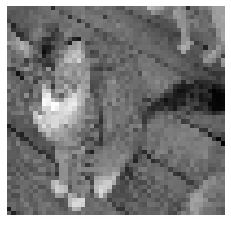

In [72]:
plt.imshow(training_data[0][0], cmap = 'gray')
plt.axis('off')
plt.show()

In [0]:
random.shuffle(training_data)

In [0]:
for sample in training_data:
  print(sample[1])

In [0]:
training_data

In [0]:
X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

In [82]:
len(X)

22500

In [83]:
len(y)

22500

In [84]:
y[0]

0

In [0]:
X = np.array(X)

In [0]:
X = X.reshape(-1, 50, 50, 1)

In [88]:
X.shape

(22500, 50, 50, 1)

In [0]:
np.save('X_train', X, allow_pickle = True)
np.save('y_train', y, allow_pickle = True)

In [0]:
X = np.load('X_train.npy')
y = np.load('y_train.npy')

In [95]:
X.shape

(22500, 50, 50, 1)

In [96]:
y.shape

(22500,)

# ConvNets

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [0]:
X = X/255.0

In [103]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.fit(X, y, batch_size = 32, epochs = 3, validation_split = 0.1)


Epoch 1/3
633/633 [==============================] - 93s 147ms/step - loss: 0.3511 - accuracy: 0.8828 - val_loss: 0.8689 - val_accuracy: 0.5329
Epoch 2/3
633/633 [==============================] - 93s 146ms/step - loss: 0.2983 - accuracy: 0.8828 - val_loss: 0.7174 - val_accuracy: 0.5329
Epoch 3/3
633/633 [==============================] - 93s 147ms/step - loss: 0.2654 - accuracy: 0.8873 - val_loss: 0.8562 - val_accuracy: 0.5871
